##  Combined Spam Filter Code

####  Download libraries

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
import matplotlib . pyplot as plt # for data visualization purposes
import seaborn as sns # statistical visualization of data
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score

In [2]:
import nltk
#nltk.download('punkt')

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


####  Import file as CSV and look at data

In [3]:
spam = pd.read_csv("C:\\Users\\rlong\\OneDrive\\Documents\\spam.csv")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


####  Give columns meaningful names and drop nuisance columns

In [4]:
spam.rename(columns = {'v1':'Label', 'v2':'EmailText'}, inplace = True)
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)  
spam.shape
spam.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


####  check for and remove duplicates

In [5]:

spam.drop_duplicates(inplace = True)
spam.shape

(5169, 2)

####  Just for fun, generate a wordcloud

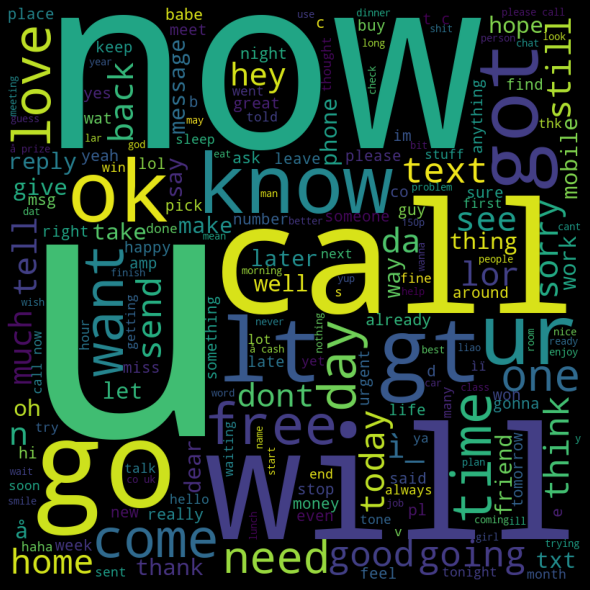

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in spam.EmailText:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Stemming the data i.e. replacing words with shortened versions.
#### This is not necessary to make the model work, but it would speed up the model with a large data set

In [16]:
# stemming!!!!

#  separating the data as text and label
X_pre_stemmed = spam['EmailText']
ps = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

X = []
for message in X_pre_stemmed:
    X.append(stemSentence(message))
    
print(X[0])

#check number of rowa and columns
spam.shape
# mail_data.head(10)

go until jurong point , crazi .. avail onli in bugi n great world la e buffet ... cine there got amor wat ... 


(5169, 2)

In [17]:
spam.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


####  Chart showing the amount of spam and ham messages

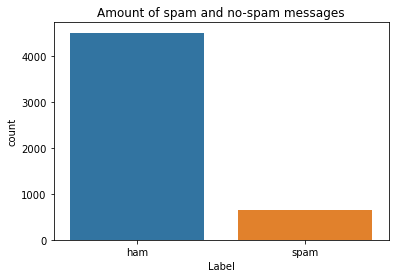

In [18]:
sns.countplot(data = spam, x= spam["Label"]).set_title("Amount of spam and no-spam messages")
plt.show()

####  Change the labels to numerical values - again not strictly necessary in this case but should speed up the model

In [20]:
# Label ecoding

# label spam mail as 0 and ham as 1
spam.loc[spam['Label'] == 'spam', 'Label',] = 0
spam.loc[spam['Label'] == 'ham', 'Label',] = 1

#check how it looks now
spam.head(10)

y = spam['Label']
print(y[0])

1


####  Split data into training and testing sets

In [21]:
z = spam['EmailText']
y = spam["Label"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

#### convert Y_train and Y_test values into integers

In [22]:

y_train = y_train.astype('int')
y_test = y_test.astype('int')

####  Convert all the words into numerical values using CountVectorizer

In [23]:
cv = CountVectorizer()
features = cv.fit_transform(z_train)

####   Train SVM model

In [24]:
#  SVM model training
svm_model = svm.SVC()
svm_model.fit(features,y_train)

SVC()

####   Train Random Forest model

In [25]:
#  RF model training
from sklearn . ensemble import RandomForestClassifier
# creating random forest classifier
clf = RandomForestClassifier ( n_estimators = 100)
# fit function is used to train the model using the training sets as parameters
clf.fit( features , y_train )

RandomForestClassifier()

####   Train Multinomial Naive Bayes model

In [26]:
#  MNB model training

nb_model = MultinomialNB()

nb_model.fit(features , y_train )

MultinomialNB()

###   Calculate scores for all three models.  Below are scores for accuracy, sensitivity and precision plus confusion matrices

In [27]:
#  SVM accuracy score
features_test = cv.transform(z_test)
print("SVM Accuracy: {}".format(svm_model.score(features_test,y_test)))

SVM Accuracy: 0.9787234042553191


In [28]:
#  RF accuracy score
print("RF Accuracy: {}".format(clf.score(features_test, y_test)))

RF Accuracy: 0.9738878143133463


In [29]:
#  MNB accuracy score
print("MNB Accuracy: {}".format(nb_model.score(features_test, y_test)))

MNB Accuracy: 0.9845261121856866


In [30]:
# SVM confusion matrix
from sklearn import metrics
import numpy as np
from sklearn . metrics import confusion_matrix
svm_y_pred = svm_model.predict ( features_test )
svm_cm = confusion_matrix (y_test , svm_y_pred )
svm_cm

array([[103,  21],
       [  1, 909]], dtype=int64)

In [31]:
# random forest confusion matrix
rf_y_pred = clf.predict ( features_test )
rf_cm = confusion_matrix (y_test , rf_y_pred )
rf_cm

array([[ 97,  27],
       [  0, 910]], dtype=int64)

In [32]:
# naive bayes confusion matrix
nb_y_pred = nb_model.predict ( features_test )
nb_cm = confusion_matrix (y_test , nb_y_pred )
nb_cm

array([[111,  13],
       [  3, 907]], dtype=int64)

In [35]:
#  SVM Recall/Sensitivity Score
from sklearn.metrics import recall_score

recall_score(y_test , svm_y_pred, pos_label = 1)

0.9989010989010989

In [36]:
#  SVM Precision Score
from sklearn.metrics import precision_score

precision_score(y_test , svm_y_pred, pos_label = 1)

0.9774193548387097

In [37]:
#  RF Recall/Sensitivity Score
from sklearn.metrics import recall_score

recall_score(y_test , rf_y_pred, pos_label = 1)

1.0

In [38]:
#  RF Precision Score
from sklearn.metrics import precision_score

precision_score(y_test , rf_y_pred, pos_label = 1)

0.9711846318036286

In [39]:
#  NB Recall/Sensitivity Score
from sklearn.metrics import recall_score

recall_score(y_test , nb_y_pred, pos_label = 1)

0.9967032967032967

In [40]:
#  NB Precision Score
from sklearn.metrics import precision_score

precision_score(y_test , nb_y_pred, pos_label = 1)

0.9858695652173913

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

####  ROC curves

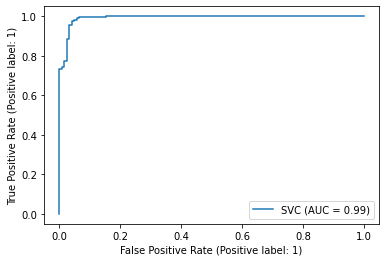

In [44]:
#  SVM roc curve
metrics.plot_roc_curve(svm_model, features_test, y_test, pos_label=1)

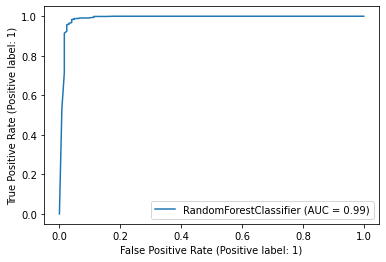

In [45]:
#  RF roc curve
metrics.plot_roc_curve(clf, features_test, y_test, pos_label=1)

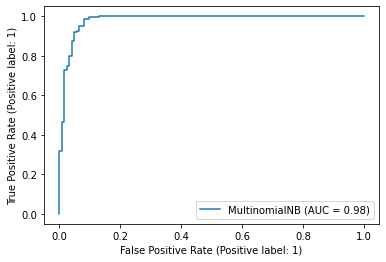

In [46]:
#  NB roc curve
metrics.plot_roc_curve(nb_model, features_test, y_test, pos_label=1)

###  Confusion Matrix visualizations using Seaborn heatmap

Text(0.5, 33.0, 'Predicted label')

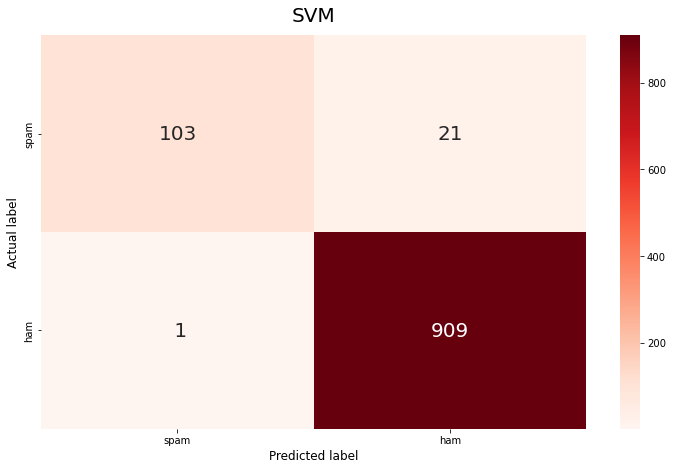

In [48]:
class_names =[0 ,1] # name of classes
fig , ax = plt. subplots (figsize=(10,6))
tick_marks = np. arange (len( class_names ))
plt. xticks ( tick_marks, class_names)
plt. yticks ( tick_marks , class_names )
# create heatmap
sns. heatmap (pd. DataFrame (svm_cm), annot = True ,cmap = "Reds" ,
              fmt="2g", xticklabels = ("spam", "ham"), yticklabels = ("spam", "ham"), 
              annot_kws={'size': 20, 'rotation': 0})
ax. xaxis . set_label_position ("bottom")
plt. tight_layout ()
plt. title ("SVM", y =1.02, fontsize=20)
plt. ylabel ("Actual label", fontsize=12)
plt. xlabel ("Predicted label", fontsize=12)

Text(0.5, 33.0, 'Predicted label')

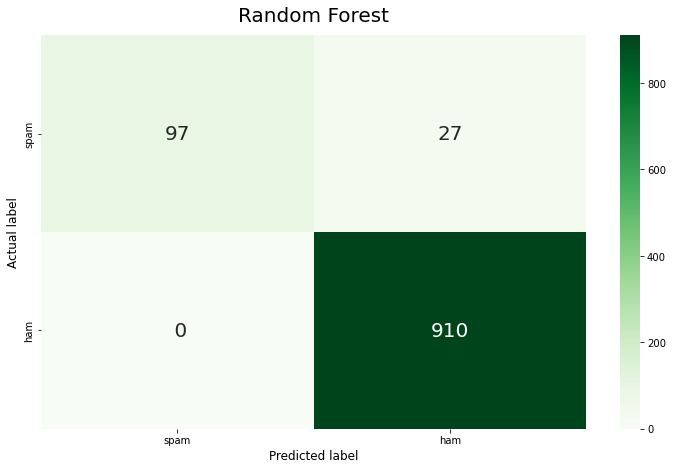

In [68]:
class_names =[0 ,1] # name of classes
fig , ax = plt. subplots (figsize=(10,6))
tick_marks = np. arange (len( class_names ))

plt. xticks ( tick_marks, class_names)
plt. yticks ( tick_marks , class_names )
# create heatmap
sns. heatmap (pd. DataFrame (rf_cm), annot = True ,cmap = "Greens" ,
              fmt="2g", xticklabels = ("spam", "ham"), yticklabels = ("spam", "ham"), 
              annot_kws={'size': 20, 'rotation': 0})
ax. xaxis . set_label_position ("bottom")
plt. tight_layout ()
plt. title ("Random Forest", y =1.02, fontsize=20)
plt. ylabel ("Actual label", fontsize=12)
plt. xlabel ("Predicted label", fontsize=12)

Text(0.5, 33.0, 'Predicted label')

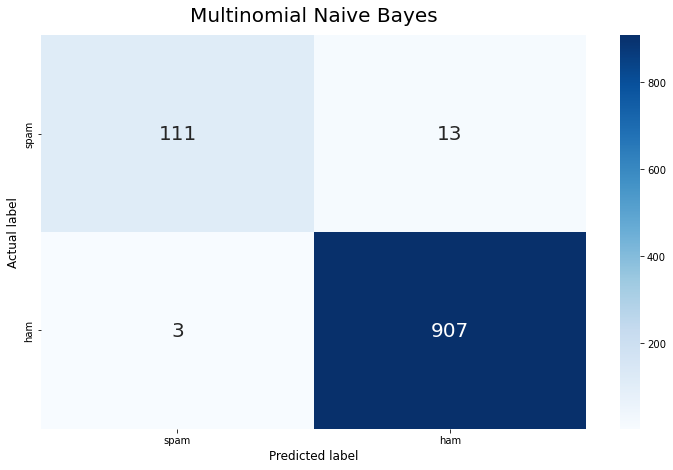

In [66]:
class_names =[0 ,1] # name of classes
fig , ax = plt. subplots (figsize=(10,6))
tick_marks = np. arange (len( class_names ))
plt. xticks ( tick_marks, class_names)
plt. yticks ( tick_marks , class_names )
# create heatmap
sns. heatmap (pd. DataFrame (nb_cm), annot = True ,cmap = "Blues" ,
              fmt="d", xticklabels = ("spam", "ham"), yticklabels = ("spam", "ham"), 
              annot_kws={'size': 20, 'rotation': 0})
ax. xaxis . set_label_position ("bottom")
plt. tight_layout ()
plt. title ("Multinomial Naive Bayes", y =1.02, fontsize=20)
plt. ylabel ("Actual label", fontsize=12)
plt. xlabel ("Predicted label", fontsize=12)

###   Now a rerun of the model 20 times to calculate an average score and allow comparison with the first result.

In [52]:
#  RF average scores
scores=[]
x=0
while x < 20:
    z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)
    # convert Y_train and Y_test values into integers
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    cv = CountVectorizer()
    features = cv.fit_transform(z_train)
    features_test = cv.transform(z_test)
    clf.fit(features,y_train)
    scores.append(float(format(clf.score(features_test,y_test))))
    x = x + 1
    

print(sum(scores)/20) 

0.9720502901353966


In [53]:
#  SVM average score
scores=[]
x=0
while x < 20:
    z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)
    # convert Y_train and Y_test values into integers
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    cv = CountVectorizer()
    features = cv.fit_transform(z_train)
    features_test = cv.transform(z_test)
    svm_model.fit(features,y_train)
    scores.append(float(format(svm_model.score(features_test,y_test))))
    x = x + 1
    

print(sum(scores)/20)

0.9788201160541588


In [54]:
#  NB average score
scores=[]
x=0
while x < 20:
    z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)
    # convert Y_train and Y_test values into integers
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    cv = CountVectorizer()
    features = cv.fit_transform(z_train)
    features_test = cv.transform(z_test)
    nb_model.fit(features,y_train)
    scores.append(float(format(nb_model.score(features_test,y_test))))
    x = x + 1
    

print(sum(scores)/20)

0.9843810444874274


####  The next cells have model data for Gaussian Naive Bayes and Bernoulli Naive Bayes.  The Multinomial Naive Bayes above returned better accuracy.  

In [55]:
#  GNB model training
features = features.toarray()
gnb_model = GaussianNB()
gnb_model.fit(features , y_train )

GaussianNB()

In [56]:
#  BNB model training

bnb_model = BernoulliNB()
bnb_model.fit(features , y_train )

BernoulliNB()

In [57]:
features_test1 = features_test.toarray()

("GaussianNB() Score " + str(gnb_model.score(features_test1, y_test)))

'GaussianNB() Score 0.9013539651837524'

In [59]:
features_test3 = cv.transform(z_test)

("BernoulliNB Score " + str(bnb_model.score(features_test3, y_test)))

'BernoulliNB Score 0.9748549323017408'

In [60]:
bnb_y_pred = bnb_model.predict ( features_test )

bnb_cm = confusion_matrix (y_test , bnb_y_pred )
bnb_cm

array([[ 96,  25],
       [  1, 912]], dtype=int64)

In [62]:
# BNB recall
recall_score(y_test , bnb_y_pred, pos_label = 1)

0.9989047097480832

In [63]:
#  BNB precision
precision_score(y_test , bnb_y_pred, pos_label = 1)

0.9733191035218783

In [64]:
#  GNB recall
gnb_y_pred = gnb_model.predict ( features_test1 )

recall_score(y_test , gnb_y_pred, pos_label = 1)

0.904709748083242

In [65]:
#  GNB precision

precision_score(y_test , gnb_y_pred, pos_label = 1)

0.9821640903686087

####  Unity Buddy, "Build a machine learning email spam detector with Python". Available at: https://blog.logrocket.com/email-spam-detector-python-machine-learning/

####  Dr Riazul Islam, course notes (Brightspace) and lectures on Statistical Learning. Available at: http://lecture.riazulislam.com/ These included useful code snippets.

####  Spam.csv. https://github.com/SmallLion/Python-Projects/blob/main/Spam-detection/spam.csv

####  macailearn - https://www.kaggle.com/code/macailearn/spam-detection/notebook

####  Weronika - https://www.kaggle.com/code/werakaggle/ml-spam-filters
